In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# View columns in measurement
inspector = inspect(engine)
mcol = inspector.get_columns('measurement')

for col in mcol:
    print(col['name'], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# View columns in station
scol = inspector.get_columns('station')

for col in scol:
    print(col['name'], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date_str = session.query(func.max(Measurement.date)).all()[0][0]
recent_date_str

'2017-08-23'

In [24]:
hp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).filter(Measurement.prcp > 3)
hp_rows = [{"Date": result[0], "Precipitation": result[1]} for result in hp]
hp_rows

[{'Date': '2017-02-11', 'Precipitation': 5.04},
 {'Date': '2017-04-29', 'Precipitation': 6.25},
 {'Date': '2016-09-14', 'Precipitation': 6.7},
 {'Date': '2016-09-15', 'Precipitation': 3.35},
 {'Date': '2016-10-04', 'Precipitation': 3.46},
 {'Date': '2017-07-22', 'Precipitation': 4.0}]

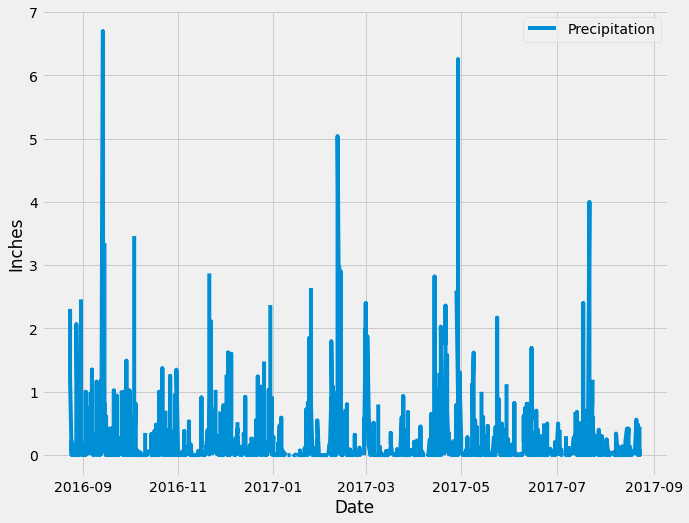

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime(2017, 8, 23)

# Calculate the date one year from the last date in data set.
start_date = recent_date - dt.timedelta(days=365)
str(start_date)

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_rows = [{"Date": result[0], "Precipitation": result[1]} for result in prcp_results]

prcp_df = pd.DataFrame(prcp_rows)
prcp_df['Date'] = pd.to_datetime(prcp_df.Date).dt.date
prcp_df = prcp_df.set_index('Date')

# Sort the dataframe by date
prcp_df.sort_values(by=['Date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
#plt.figure()
ax = prcp_df.plot(figsize=(10,8))

plt.ylabel('Inches')

plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()